In [1]:
import torch
import joblib
import pickle
import pandas as pd
import numpy as np
from functions import auroc_curve, evaluation, rm, complete_confusion_matrix_robust, evaluation_robustness, complete_confusion_matrix
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])
model_results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [2]:
X_test = rm(pd.read_csv(path_csv + "ontime_reporting_X_test.csv"))
y_test = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test.csv"))

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression tuned imbalanced model

In [3]:
logreg_tuned_imbalance = joblib.load(path_model + "logreg_tuned_imbalance.joblib")
y_pred_logreg_tuned_imbalance = logreg_tuned_imbalance.predict(X_test)
y_pred_prob_logreg_tuned_imbalance = logreg_tuned_imbalance.predict_proba(X_test)[:, 1]

AUROC Score:  0.739
Accuracy Score:  0.841
Balanced Accuracy Score:  0.663
F1 Score:  0.473
Recall Score:  0.377
Precision Score:  0.634


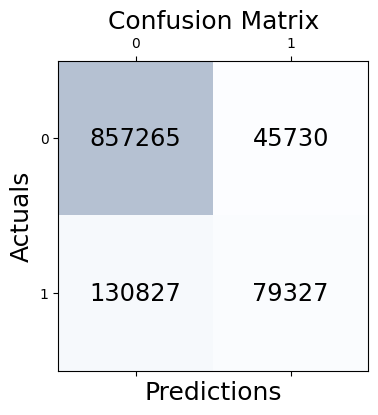

In [4]:
evaluation(y_test, y_pred_logreg_tuned_imbalance, logreg_tuned_imbalance, y_pred_prob_logreg_tuned_imbalance, results)

## Evaluate XGBoost tuned imbalanced model

In [4]:
xgb_class_tuned_imbalance = joblib.load(path_model + "XGBoost_tuned_imbalance.joblib") #xgb version 1.7.5
y_pred_xgb_tuned_imbalance = xgb_class_tuned_imbalance.predict(X_test)
y_pred_prob_xgb_tuned_imbalance = xgb_class_tuned_imbalance.predict_proba(X_test)[:, 1]

AUROC Score:  0.822
Accuracy Score:  0.858
Balanced Accuracy Score:  0.689
F1 Score:  0.526
Recall Score:  0.416
Precision Score:  0.713


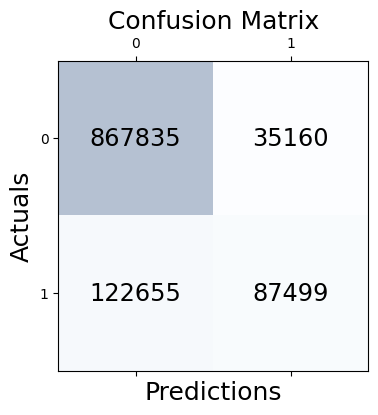

In [6]:
evaluation(y_test, y_pred_xgb_tuned_imbalance, xgb_class_tuned_imbalance, y_pred_prob_xgb_tuned_imbalance, results)

## Evaluate TabNet tuned imbalanced model

In [5]:
tabnet_tuned_imbalance = torch.load(path_model + "TabNet_tuned_imbalance.pt", map_location=torch.device('cpu'))
tabnet_tuned_imbalance.device = "cpu"
y_pred_tabnet_tuned_imbalance = tabnet_tuned_imbalance.predict(X_test.values)
y_pred_prob_tabnet_tuned_imbalance = tabnet_tuned_imbalance.predict_proba(X_test.values)[:, 1]

AUROC Score:  0.76
Accuracy Score:  0.843
Balanced Accuracy Score:  0.667
F1 Score:  0.48
Recall Score:  0.384
Precision Score:  0.64


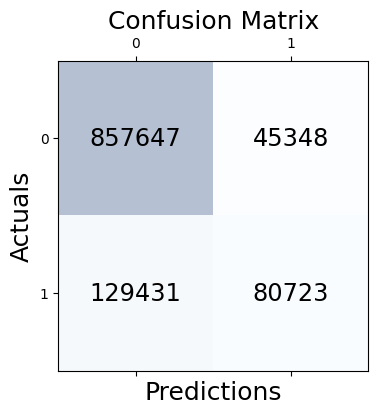

In [8]:
evaluation(y_test, y_pred_tabnet_tuned_imbalance, tabnet_tuned_imbalance, y_pred_prob_tabnet_tuned_imbalance, results)

## Evaluate Random Forests tuned imbalanced model

In [6]:
rf_tuned_imbalanced = joblib.load(path_model + "rf_tuned_imbalanced.joblib")
y_pred_rf_tuned_imbalanced = rf_tuned_imbalanced.predict(X_test)
y_pred_prob_rf_tuned_imbalanced = rf_tuned_imbalanced.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   37.3s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:   59.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   32.1s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:   53.1s finished


AUROC Score:  0.798
Accuracy Score:  0.85
Balanced Accuracy Score:  0.669
F1 Score:  0.488
Recall Score:  0.378
Precision Score:  0.687


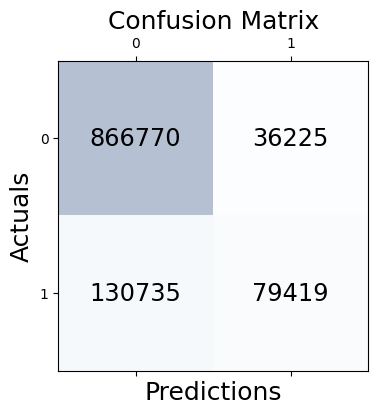

In [10]:
evaluation(y_test, y_pred_rf_tuned_imbalanced, rf_tuned_imbalanced, y_pred_prob_rf_tuned_imbalanced, results)

## Final results per model

In [11]:
results.sort_values(by=["AUROC"], ascending=False)

,Model,AUROC,Accuracy,F1,Recall,Precision
2,XGBClassifier,0.822,0.858,0.526,0.416,0.713
4,RandomForestClassifier,0.798,0.850,0.488,0.378,0.687
3,TabNetClassifier,0.760,0.843,0.480,0.384,0.640
1,LogisticRegression,0.739,0.841,0.473,0.377,0.634


In [7]:
final_result = model_results.groupby('Model').agg({
    'AUROC': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Accuracy': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'F1': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Recall': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Precision': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))]
})

final_result.columns = ['_'.join(col).strip() for col in final_result.columns.values]

final_result.sort_values(by=["AUROC_mean"], ascending=False)

,AUROC_mean,AUROC_range,Accuracy_mean,Accuracy_range,F1_mean,F1_range,Recall_mean,Recall_range,Precision_mean,Precision_range
Model,,,,,,,,,,
XGBClassifier,0.8778,0.070,0.8756,0.022,0.5852,0.074,0.4644,0.061,0.7916,0.099
RandomForestClassifier,0.8348,0.046,0.8572,0.009,0.5106,0.029,0.3950,0.022,0.7220,0.044
TabNetClassifier,0.7610,0.002,0.8438,0.001,0.4812,0.002,0.3848,0.002,0.6424,0.003
LogisticRegression,0.7394,0.001,0.8418,0.001,0.4742,0.002,0.3780,0.002,0.6368,0.004


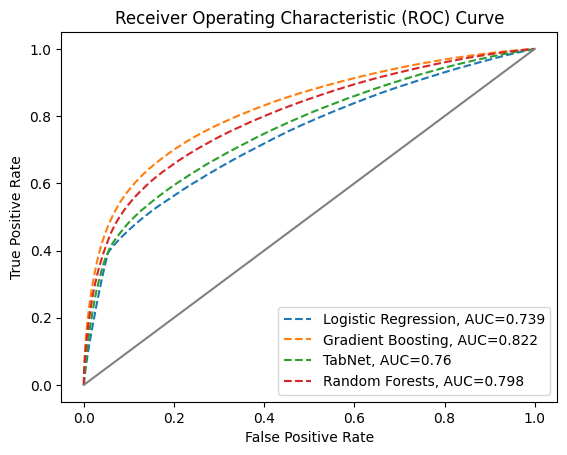

<Figure size 1400x1200 with 0 Axes>

In [12]:
auroc_curve(y_test, y_pred_prob_logreg_tuned_imbalance, y_pred_prob_xgb_tuned_imbalance, y_pred_prob_tabnet_tuned_imbalance, y_pred_prob_rf_tuned_imbalanced)

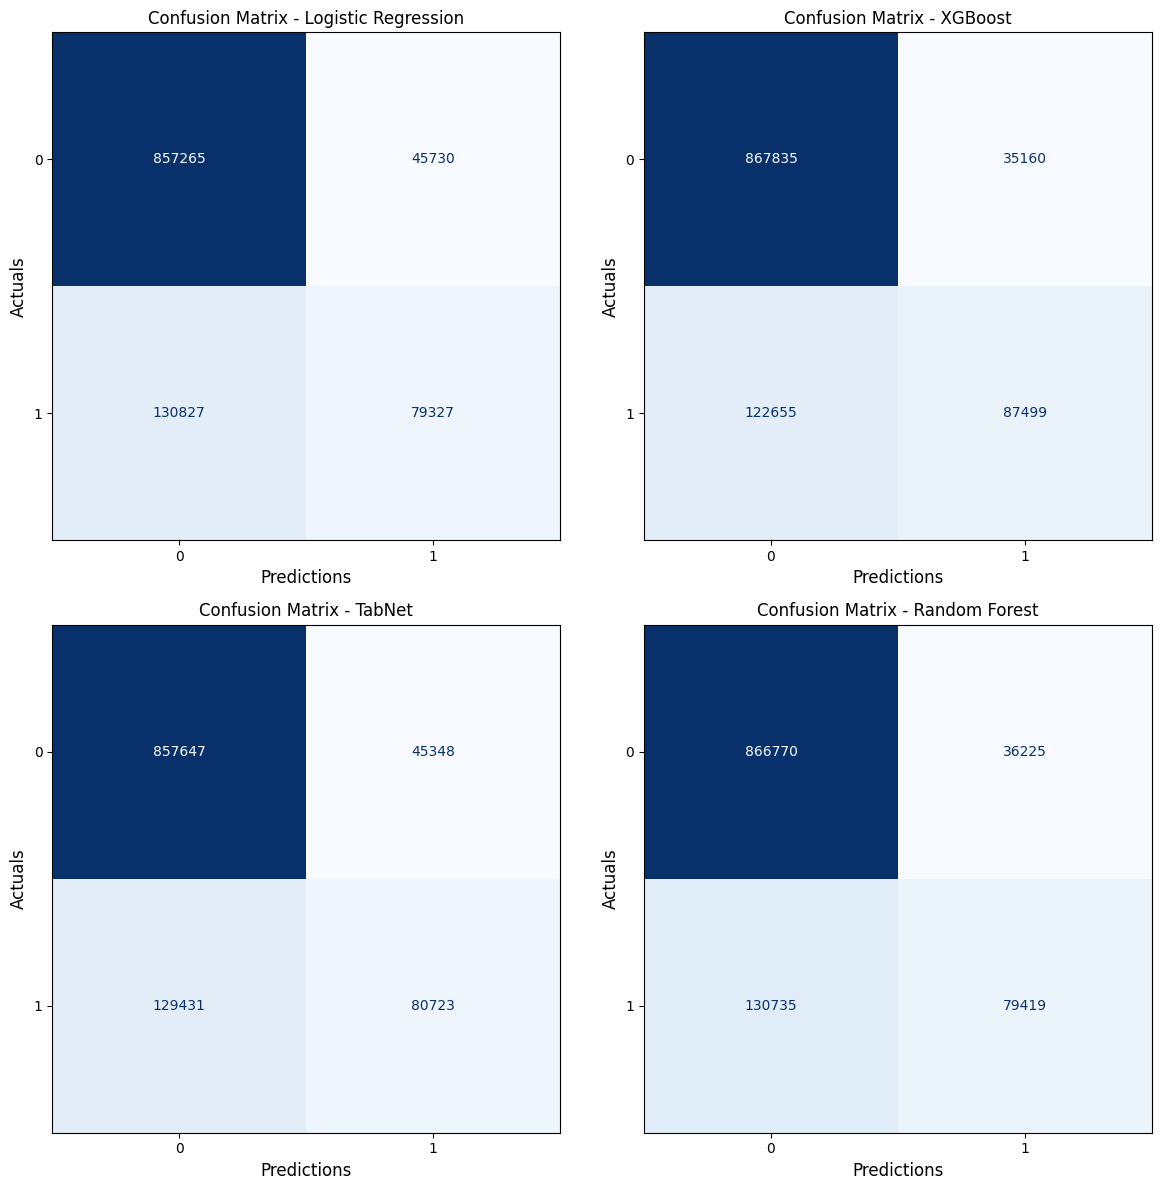

In [7]:
complete_confusion_matrix(y_test, [y_pred_logreg_tuned_imbalance, 
                                   y_pred_xgb_tuned_imbalance, 
                                   y_pred_tabnet_tuned_imbalance, 
                                   y_pred_rf_tuned_imbalanced], 
                                   ['Logistic Regression', 
                                    'XGBoost', 
                                    'TabNet', 
                                    'Random Forest'])

## Feature importance of best model

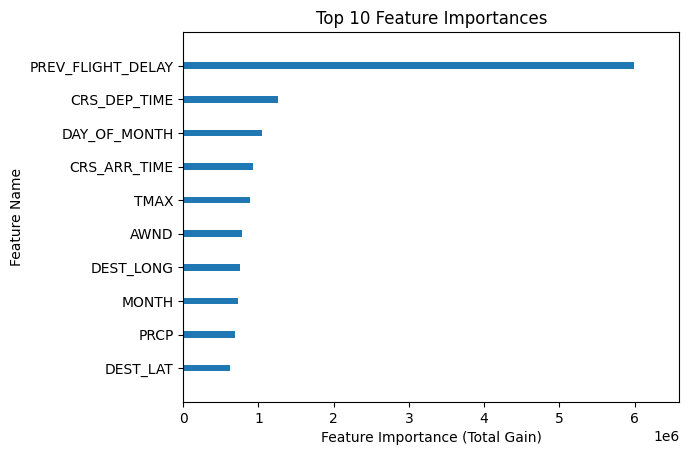

In [8]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

xgb_class_tuned_imbalance = joblib.load(path_model + "XGBoost_tuned_imbalance.joblib")

ax = plot_importance(xgb_class_tuned_imbalance.get_booster().get_score(importance_type='total_gain'), max_num_features=10, show_values=False, grid=False)

for patch in ax.patches:
    patch.set_linewidth(10)

plt.xlabel('Feature Importance (Total Gain)')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.show()